In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [143]:
Baseball_Data =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [144]:
Baseball_Data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [145]:
Baseball_Dataset = Baseball_Data.rename(columns={'W': 'win', 'R': 'runs','AB':'at_bats','H': 'hits', '2B': 'doubles','3B': 'tripples','HR': 'homeruns', 'BB': 'walks','SO':'strikouts','SB': 'stolen_bases','RA': 'runs_allowed','ER': 'earned_runs','ERA': 'earned_run_average','CG': 'complete_game', 'SHO':'shutout','SV': 'saves', 'E': 'errors'})
Baseball_Dataset.head()

,win,runs,at_bats,hits,doubles,tripples,homeruns,walks,strikouts,stolen_bases,runs_allowed,earned_runs,earned_run_average,complete_game,shutout,saves,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [146]:
Baseball_Dataset.shape

(30, 17)

In [147]:
Baseball_Dataset.isnull().sum()

win                   0
runs                  0
at_bats               0
hits                  0
doubles               0
tripples              0
homeruns              0
walks                 0
strikouts             0
stolen_bases          0
runs_allowed          0
earned_runs           0
earned_run_average    0
complete_game         0
shutout               0
saves                 0
errors                0
dtype: int64

In [148]:
Baseball_Dataset.dtypes

win                     int64
runs                    int64
at_bats                 int64
hits                    int64
doubles                 int64
tripples                int64
homeruns                int64
walks                   int64
strikouts               int64
stolen_bases            int64
runs_allowed            int64
earned_runs             int64
earned_run_average    float64
complete_game           int64
shutout                 int64
saves                   int64
errors                  int64
dtype: object

In [149]:
Baseball_Dataset.count()

win                   30
runs                  30
at_bats               30
hits                  30
doubles               30
tripples              30
homeruns              30
walks                 30
strikouts             30
stolen_bases          30
runs_allowed          30
earned_runs           30
earned_run_average    30
complete_game         30
shutout               30
saves                 30
errors                30
dtype: int64

In [150]:
Baseball_Dataset.describe()

,win,runs,at_bats,hits,doubles,tripples,homeruns,walks,strikouts,stolen_bases,runs_allowed,earned_runs,earned_run_average,complete_game,shutout,saves,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [151]:
Baseball_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   win                 30 non-null     int64  
 1   runs                30 non-null     int64  
 2   at_bats             30 non-null     int64  
 3   hits                30 non-null     int64  
 4   doubles             30 non-null     int64  
 5   tripples            30 non-null     int64  
 6   homeruns            30 non-null     int64  
 7   walks               30 non-null     int64  
 8   strikouts           30 non-null     int64  
 9   stolen_bases        30 non-null     int64  
 10  runs_allowed        30 non-null     int64  
 11  earned_runs         30 non-null     int64  
 12  earned_run_average  30 non-null     float64
 13  complete_game       30 non-null     int64  
 14  shutout             30 non-null     int64  
 15  saves               30 non-null     int64  
 16  errors    

In [152]:
Baseball_Dataset['ERA'] = Baseball_Data['ERA'].astype(int)

In [153]:
Baseball_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   win                 30 non-null     int64  
 1   runs                30 non-null     int64  
 2   at_bats             30 non-null     int64  
 3   hits                30 non-null     int64  
 4   doubles             30 non-null     int64  
 5   tripples            30 non-null     int64  
 6   homeruns            30 non-null     int64  
 7   walks               30 non-null     int64  
 8   strikouts           30 non-null     int64  
 9   stolen_bases        30 non-null     int64  
 10  runs_allowed        30 non-null     int64  
 11  earned_runs         30 non-null     int64  
 12  earned_run_average  30 non-null     float64
 13  complete_game       30 non-null     int64  
 14  shutout             30 non-null     int64  
 15  saves               30 non-null     int64  
 16  errors    

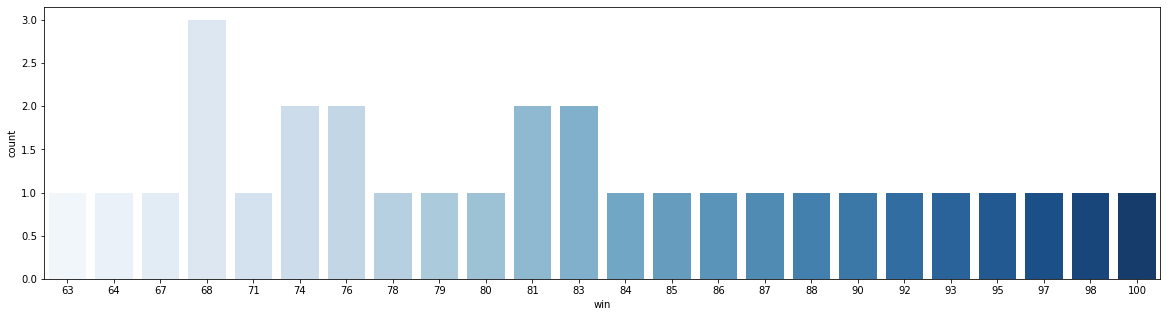

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(x= Baseball_Dataset['win'],palette = 'Blues')
plt.show()

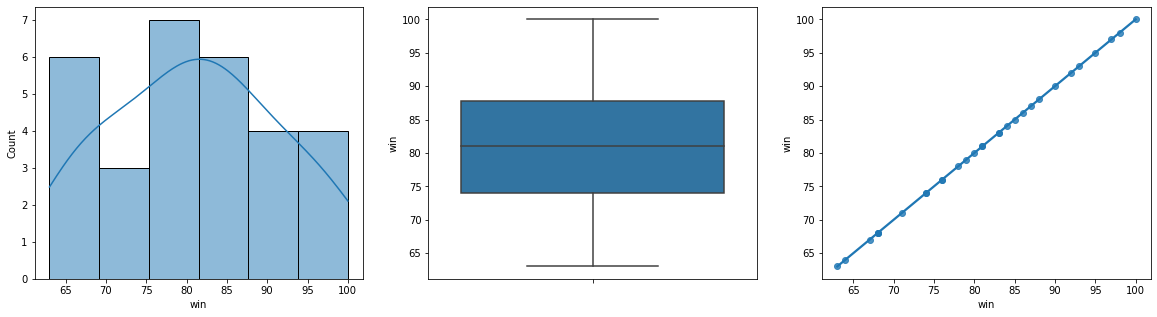

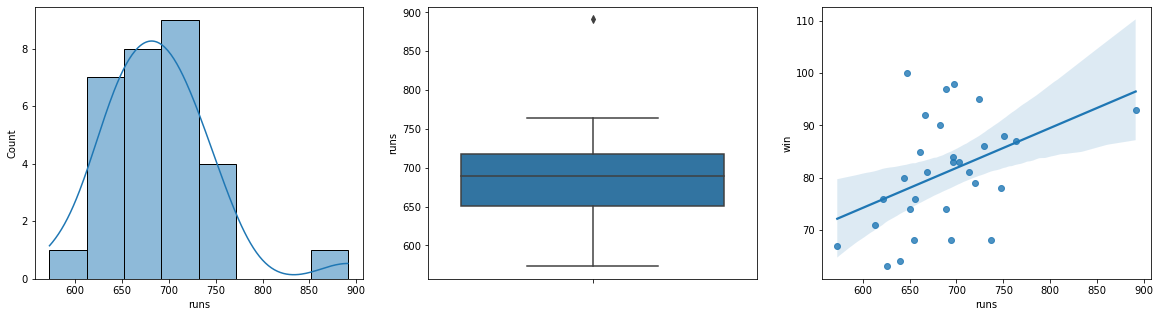

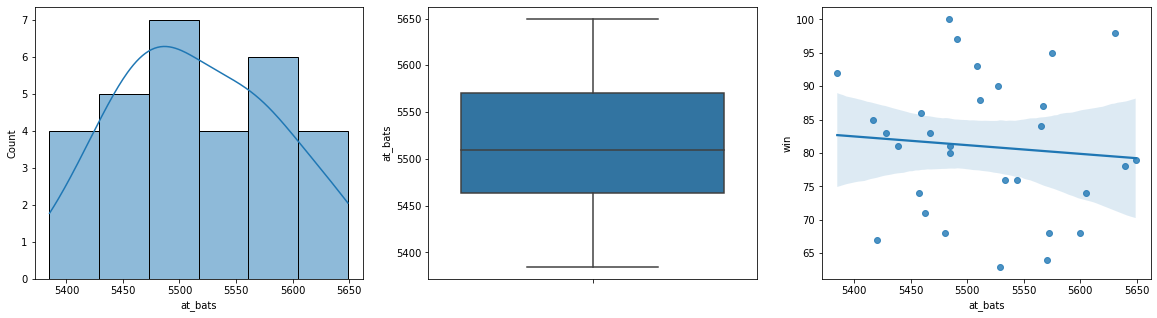

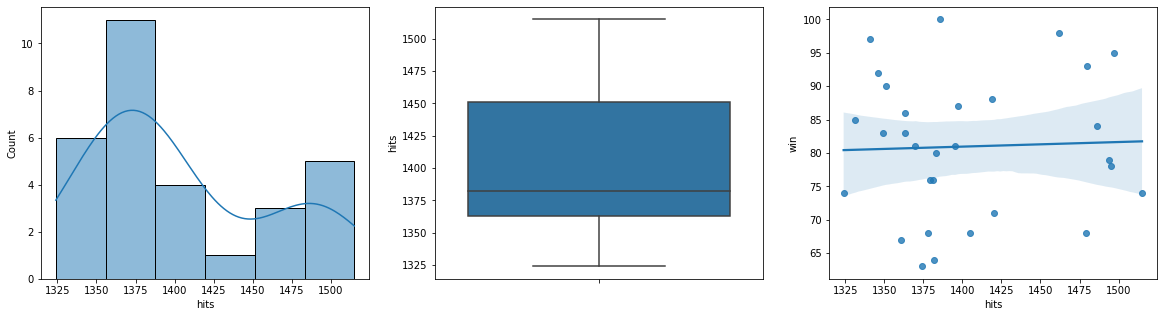

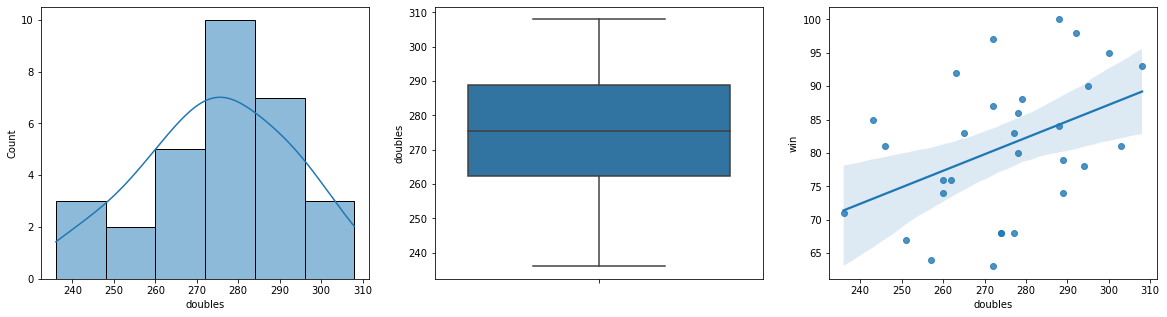

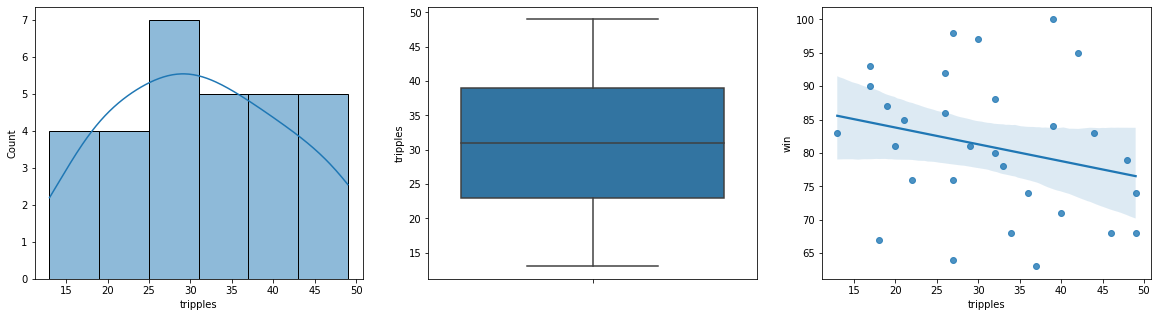

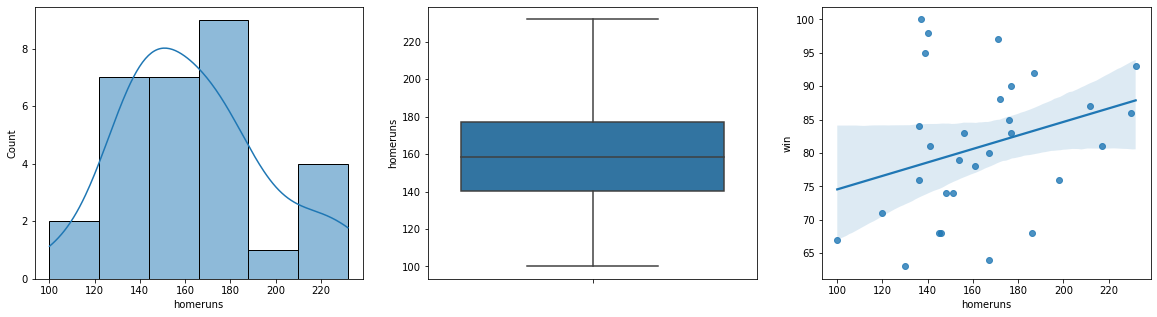

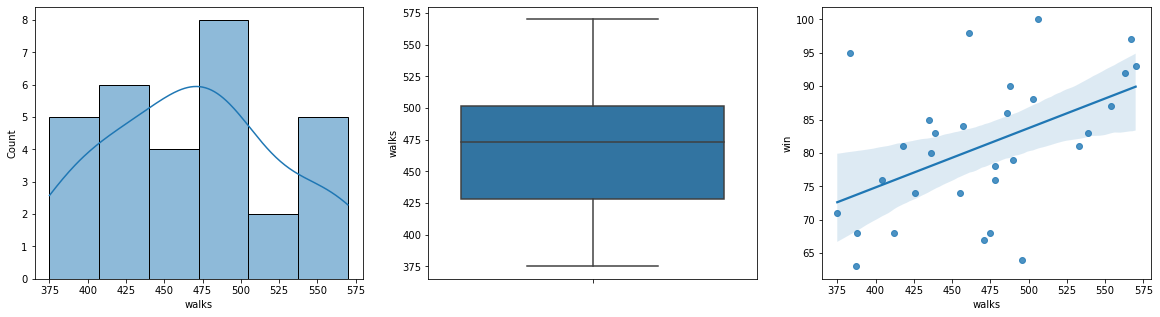

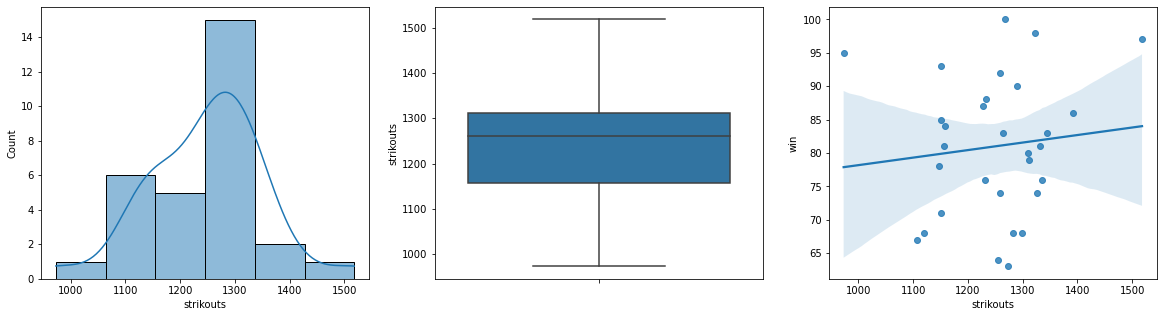

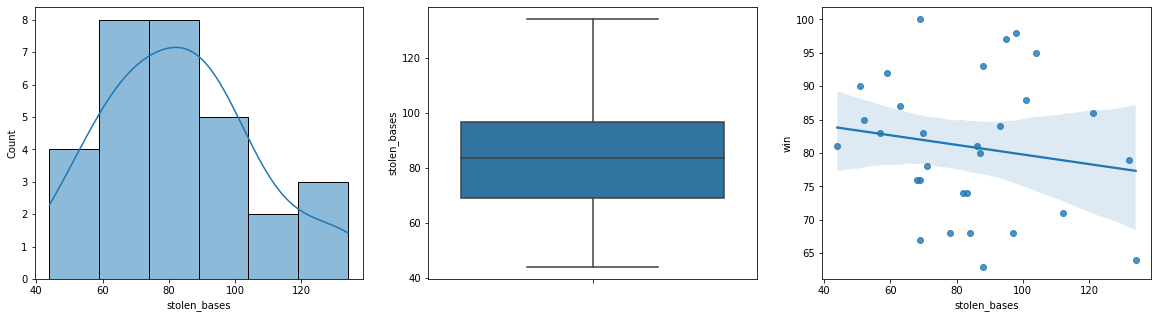

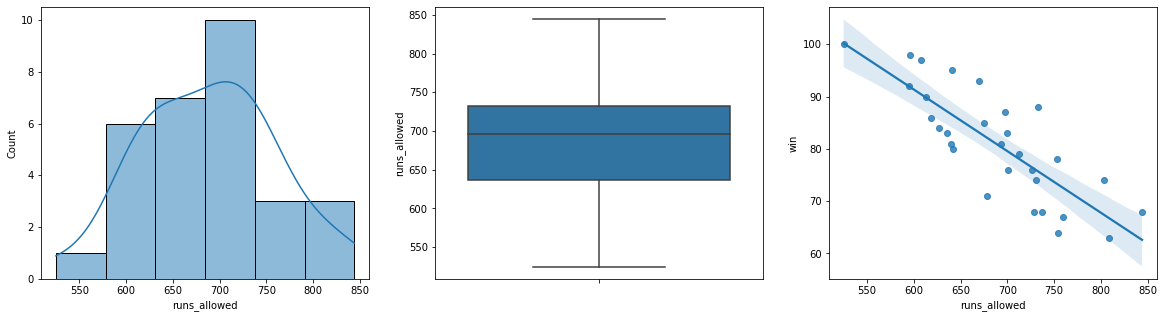

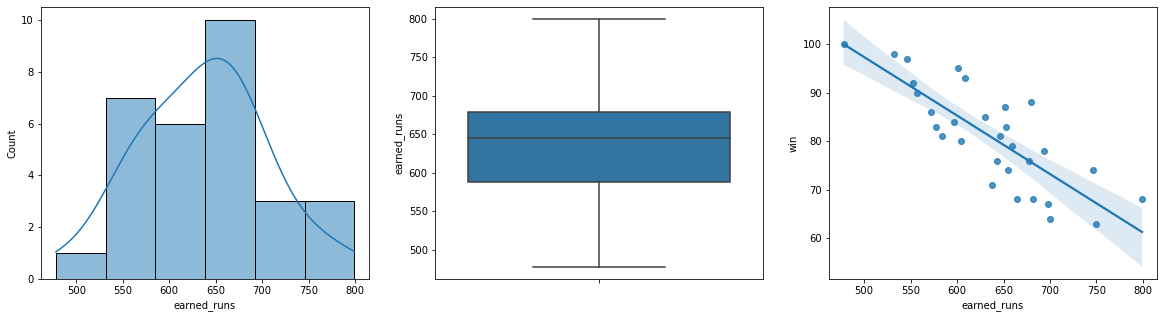

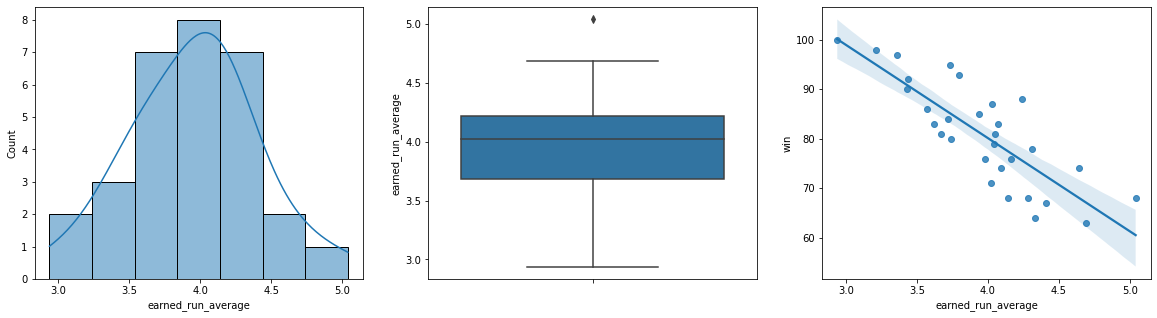

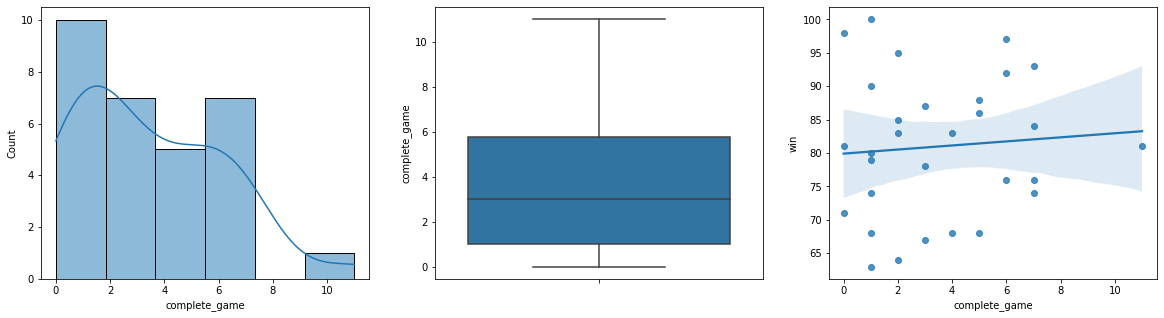

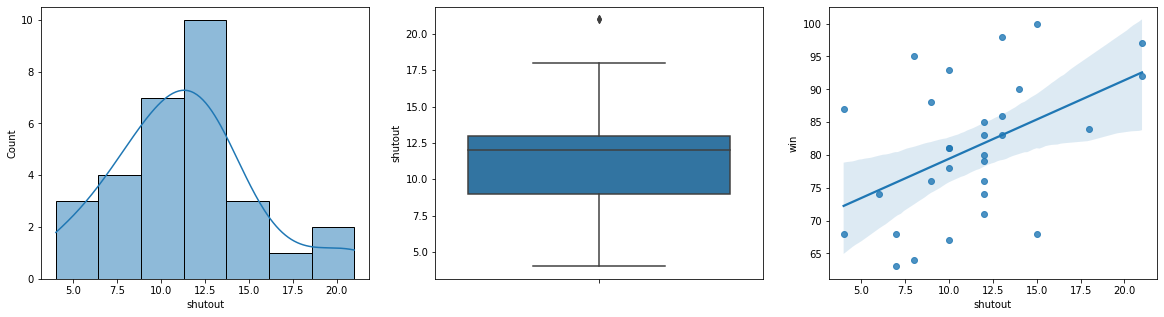

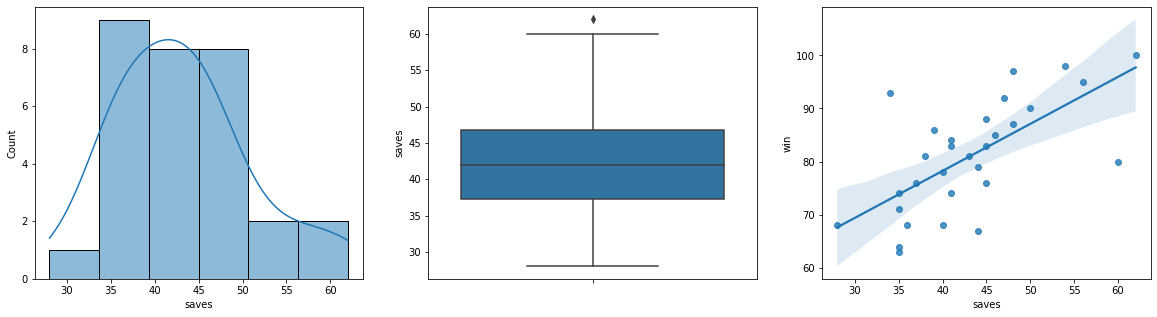

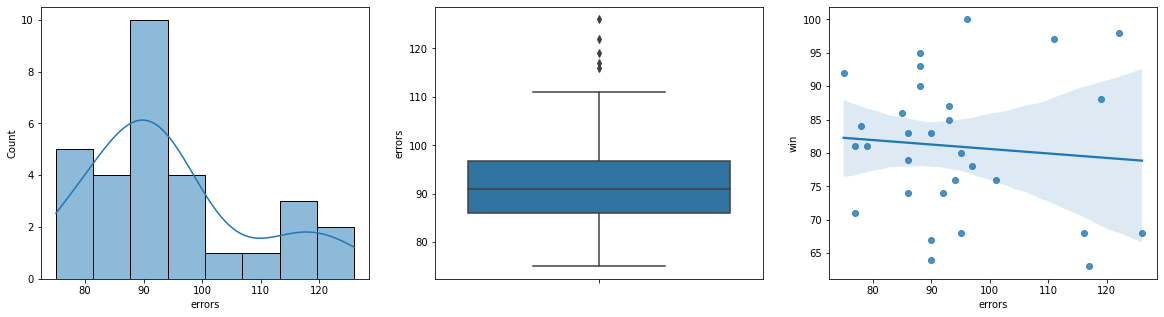

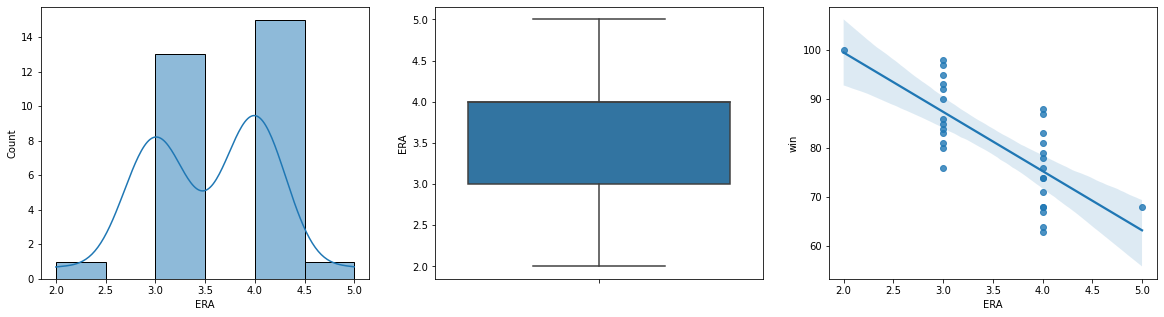

In [155]:
numerical = Baseball_Dataset.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    sns.histplot(data=Baseball_Dataset, x=col,kde=True, ax=ax[0])
    sns.regplot(data = Baseball_Dataset, x=col, y = "win")
    sns.boxplot(data=Baseball_Dataset, y=col, ax=ax[1]);

<AxesSubplot:>

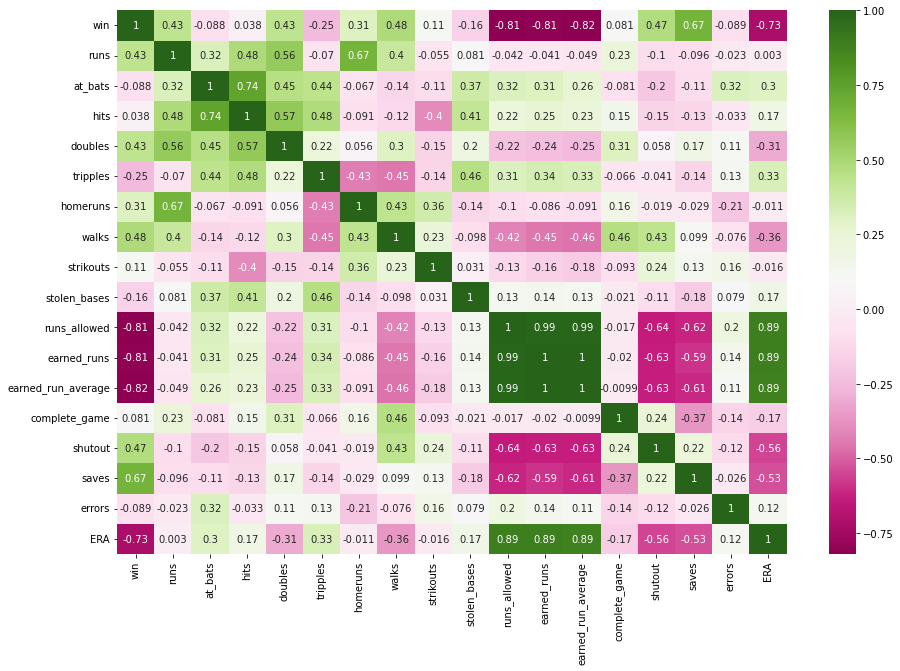

In [156]:
plt.figure(figsize = (15,10))
sns.heatmap(Baseball_Dataset.corr(), annot=True,cmap='PiYG')

In [157]:
# Run and win are linearly correlated. And outliers are present between 850 and 900.
# At balls is very weekly related to Wins With no outliers.
# Hits are also very weekly related to winning with no outliers.
# Doubles are linearly related with Wins, with no outlier, and data is left-skewed.
# Triple has very weak negative correlations with win with no outlier and data is right-skewed.
# The home run has a very low correlation with wins with no lot of outliers and data is right-skewed.
# Walk is lightly correlated to win with no outlier
# Strikeout is not correlated to win with no outlier and the dataset is left-skewed.
# Stolen Bases is not correlated to win with no outlier
# Runs Allowed is highly correlated to win with no outliers
# Earned Runs is highly correlated to win with no outliers
# Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.
# Shutouts are highly correlated to win with no outliers and data is right-skewed.
# Saves are lightly correlated to win with no outliers-skewed.
# Errors are not correlated to win, the data has outliers and data is right-skewed.

In [158]:
# The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

# Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

# The remaining features have less to no linear correlation with no of Wins

# The dataset set has too much randomness. And only has sets of data (too little to form a suitable Decision tree)

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [161]:
# Model training
# Logistc Regression
model = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [ ]:
# training the Logistc Regression model with training data
model.fit(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [163]:
# Position of the Outlier
print(np.where(Baseball_Dataset['runs']>850))

(array([5], dtype=int64),)
